<a href="https://colab.research.google.com/github/Gulwalishah/Interpolation/blob/main/Interpolation_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

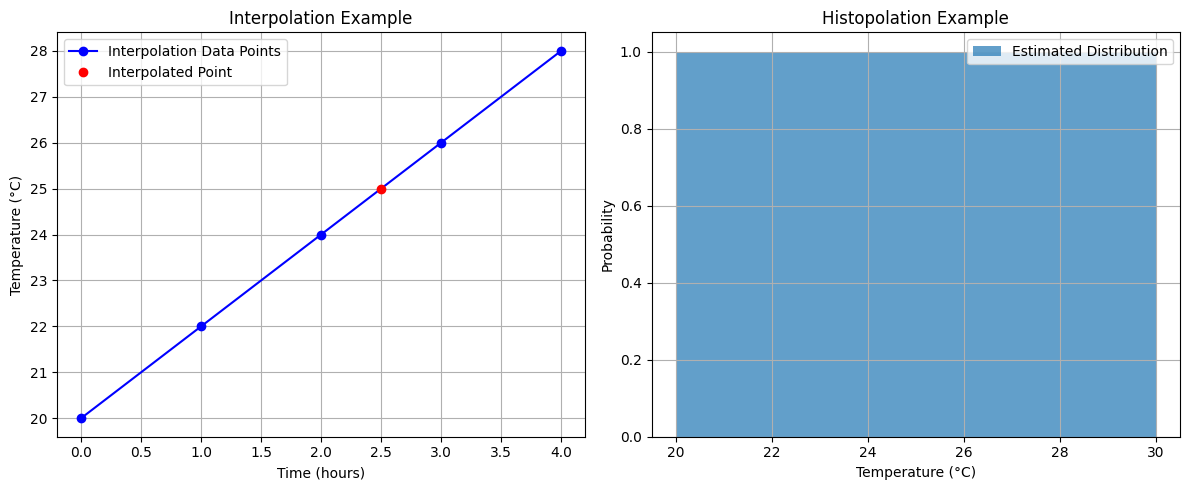

Interpolation: Estimated temperature at t = 2.5: 25.0°C
Histopolation: Estimated temperature distribution at t = 2.5:
1.0


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Interpolation data
time_interpolation = np.array([0, 1, 2, 3, 4])
temperature_interpolation = np.array([20, 22, 24, 26, 28])

# Time for interpolation
time_to_estimate = 2.5

# Linear interpolation
estimated_temperature_interpolation = np.interp(time_to_estimate, time_interpolation, temperature_interpolation)

# Histopolation data (temperature ranges and counts)
temperature_ranges = np.array([20, 22, 24, 26, 28])
observations = np.array([5, 10, 15, 7])

# Time for histopolation
time_to_estimate_histopolation = 2.5

# Calculate estimated temperature distribution using histopolation
estimated_distribution = np.interp(time_to_estimate_histopolation, time_interpolation, temperature_interpolation)
estimated_distribution = estimated_distribution / np.sum(estimated_distribution)  # Normalize to get a probability distribution

# Create a plot
plt.figure(figsize=(12, 5))

# Interpolation plot
plt.subplot(1, 2, 1)
plt.plot(time_interpolation, temperature_interpolation, 'bo-', label='Interpolation Data Points')
plt.plot(time_to_estimate, estimated_temperature_interpolation, 'ro', label='Interpolated Point')
plt.xlabel('Time (hours)')
plt.ylabel('Temperature (°C)')
plt.title('Interpolation Example')
plt.legend()
plt.grid(True)

# Histopolation plot
plt.subplot(1, 2, 2)
plt.bar(temperature_ranges, estimated_distribution, width=2, align='edge', alpha=0.7, label='Estimated Distribution')
plt.xlabel('Temperature (°C)')
plt.ylabel('Probability')
plt.title('Histopolation Example')
plt.legend()
plt.grid(True)

# Show the combined plot
plt.tight_layout()
plt.show()

# Display the estimated temperature and distribution
print(f"Interpolation: Estimated temperature at t = {time_to_estimate}: {estimated_temperature_interpolation}°C")
print(f"Histopolation: Estimated temperature distribution at t = {time_to_estimate_histopolation}:\n{estimated_distribution}")


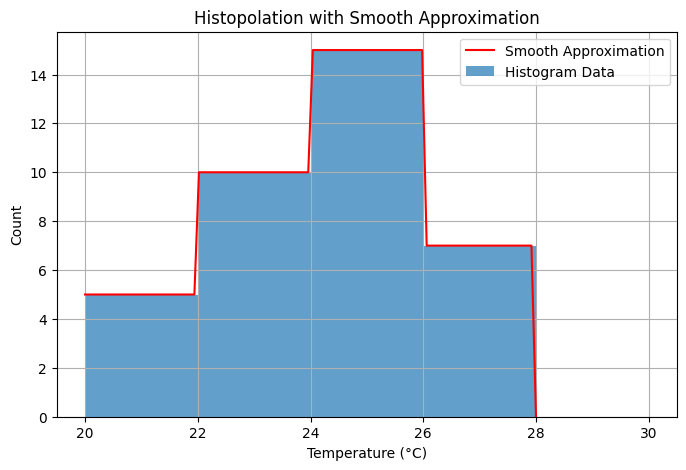

Estimated temperature distribution at t = 2.5:
[ 5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.
  5.  5.  5.  5.  5.  5.  5. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 15. 15. 15. 15.
 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15.
 15. 15. 15.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.
  7.  7.  7.  7.  7.  7.  7.  7.  7.  0.]


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Temperature ranges and counts from the histogram
temperature_ranges = np.array([20, 22, 24, 26, 28])
observations = np.array([5, 10, 15, 7, 0])  # Added a 0 count for the last range

# Time for histopolation
time_to_estimate_histopolation = 2.5

# Create a finer range of temperatures for smooth approximation
smooth_temperature_ranges = np.linspace(20, 28, 100)

# Initialize an array for the estimated distribution
estimated_distribution = np.zeros_like(smooth_temperature_ranges, dtype=float)

# Iterate through temperature ranges and approximate the distribution
for i in range(len(temperature_ranges) - 1):
    range_start = temperature_ranges[i]
    range_end = temperature_ranges[i + 1]
    count = observations[i]
    mask = (smooth_temperature_ranges >= range_start) & (smooth_temperature_ranges < range_end)
    estimated_distribution[mask] = count

# Create a plot
plt.figure(figsize=(8, 5))

# Plot the histogram data
plt.bar(temperature_ranges, observations, width=2, align='edge', alpha=0.7, label='Histogram Data')
plt.xlabel('Temperature (°C)')
plt.ylabel('Count')
plt.title('Histopolation Example')
plt.legend()

# Plot the smooth approximation
plt.plot(smooth_temperature_ranges, estimated_distribution, 'r-', label='Smooth Approximation')
plt.xlabel('Temperature (°C)')
plt.ylabel('Count')
plt.title('Histopolation with Smooth Approximation')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

# Display the estimated distribution
print(f"Estimated temperature distribution at t = {time_to_estimate_histopolation}:\n{estimated_distribution}")
